In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('output_file.csv')
df.head()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate
0,1994,7.563295,1.320,6.81,5.599919,0.002765,60.789,287.222835,110.460068,13.03
1,1995,8.879073,1.373,3.69,5.500085,0.005484,58.447,289.867198,112.443451,12.27
2,1996,9.687539,1.425,7.42,3.799967,0.054464,59.067,292.178377,106.883110,11.35
3,1997,10.032998,1.478,4.29,6.405400,0.162465,58.931,294.197465,106.883110,10.60
4,1998,10.023450,1.530,28.60,4.698423,0.296351,62.937,295.978281,105.266380,9.17


In [ ]:
# Check for missing values
print(df.isnull().sum())

Year                           0
IntentionalHomicidesRate       0
AlcoholConsumption             0
HeatIndex                      0
GDPgrowth                      0
InternetUsers                  0
LaborForceParticipationRate    0
PopulationDensity              0
SchoolEnrollmentPrimary        0
UnemploymentRate               0
dtype: int64


In [ ]:
 #Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print("Augmented Dickey-Fuller Test Results:")
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.3f}")
    return result[1] < 0.05  # Return True if p-value < 0.05 (stationary)


In [ ]:
def check_stationarity_KPSS(series):
    from statsmodels.tsa.stattools import kpss

    # Perform KPSS Test
    result = kpss(series, regression='c')  # 'c' for level-stationary, 'ct' for trend-stationary

    # Extract Results
    print("KPSS Test Statistic:", result[0])
    print("p-value:", result[1])

    return result[1] > 0.05

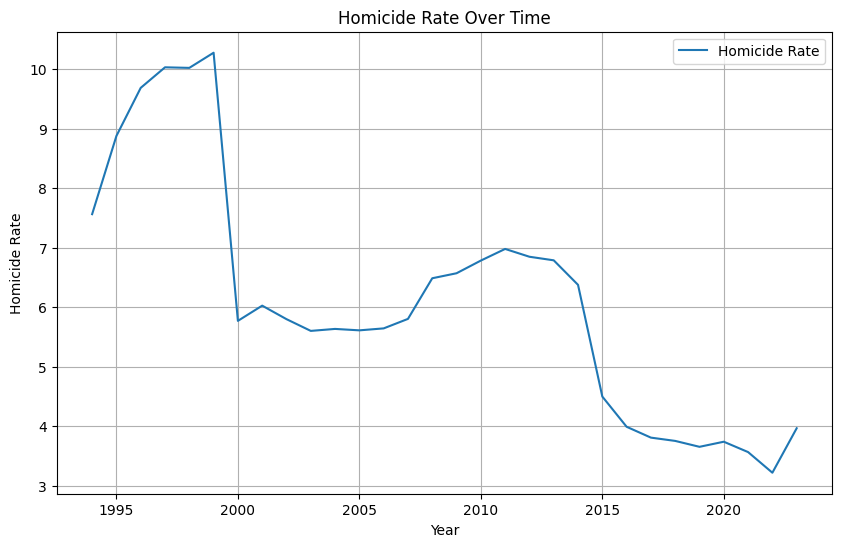

In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['IntentionalHomicidesRate'], label="Homicide Rate")
plt.title("Homicide Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Homicide Rate")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
check_stationarity(df['IntentionalHomicidesRate'])

Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.474
p-value: 0.546
Critical Values:
   1%: -3.689
   5%: -2.972
   10%: -2.625


False

In [ ]:
check_stationarity_KPSS(df['IntentionalHomicidesRate'])

KPSS Test Statistic: 0.6135358904259658
p-value: 0.021405828143094018


False

In [ ]:
# Calculate the first difference of 'IntentionalHomicidesRate'
df['IntentionalHomicidesRate_diff'] = df['IntentionalHomicidesRate'].diff()

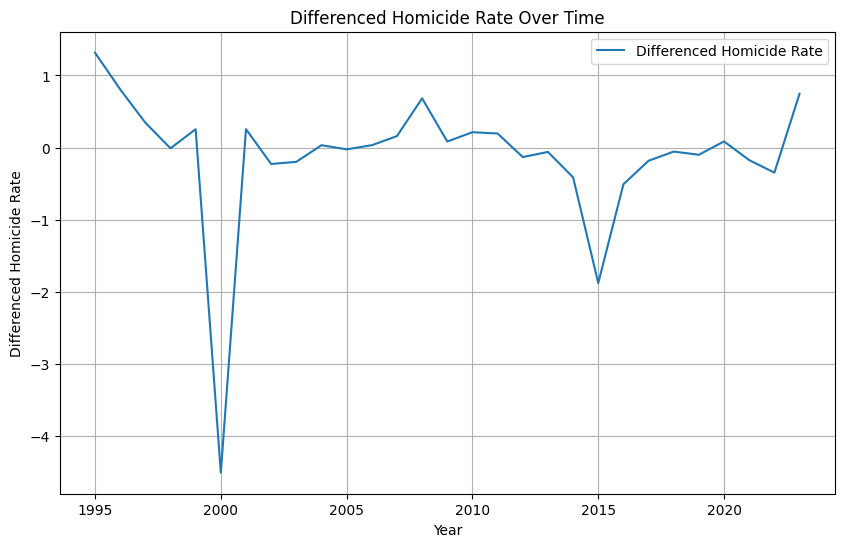

Augmented Dickey-Fuller Test Results:
ADF Statistic: -5.212
p-value: 0.000
Critical Values:
   1%: -3.689
   5%: -2.972
   10%: -2.625
KPSS Test Statistic: 0.06829067672725112
p-value: 0.1
The differenced series is stationary.


<ipython-input-104-06615c616375>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for level-stationary, 'ct' for trend-stationary


In [ ]:
# Apply differencing
df['IntentionalHomicidesRate_diff'] = df['IntentionalHomicidesRate'].diff()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'][1:], df['IntentionalHomicidesRate_diff'][1:], label="Differenced Homicide Rate")
plt.title("Differenced Homicide Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Differenced Homicide Rate")
plt.legend()
plt.grid(True)
plt.show()

# Re-check stationarity
is_stationary_diff = check_stationarity(df['IntentionalHomicidesRate_diff'].dropna()) and check_stationarity_KPSS(df['IntentionalHomicidesRate_diff'].dropna())
if is_stationary_diff:
    print("The differenced series is stationary.")
else:
    print("The differenced series is still non-stationary.")


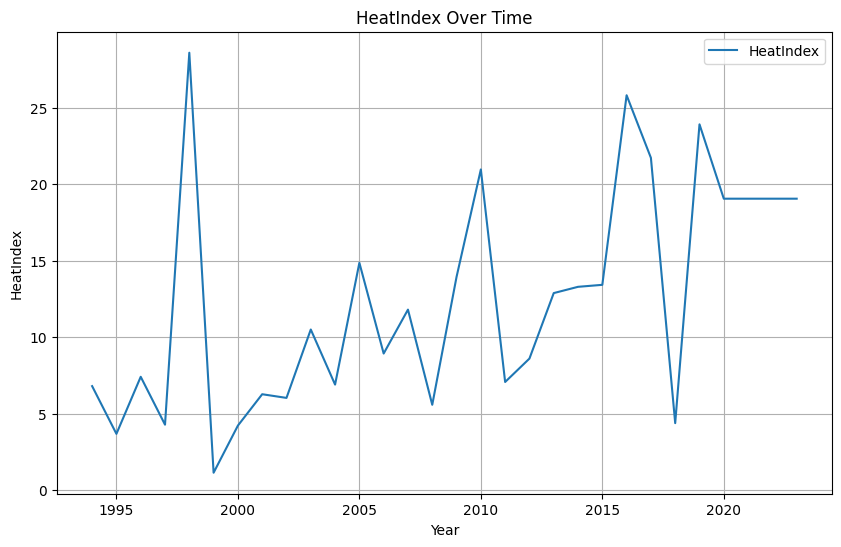

Augmented Dickey-Fuller Test Results:
ADF Statistic: 0.428
p-value: 0.983
Critical Values:
   1%: -3.753
   5%: -2.998
   10%: -2.639


False

In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['HeatIndex'], label="HeatIndex")
plt.title("HeatIndex Over Time")
plt.xlabel("Year")
plt.ylabel("HeatIndex")
plt.legend()
plt.grid(True)
plt.show()

check_stationarity(df['HeatIndex'])

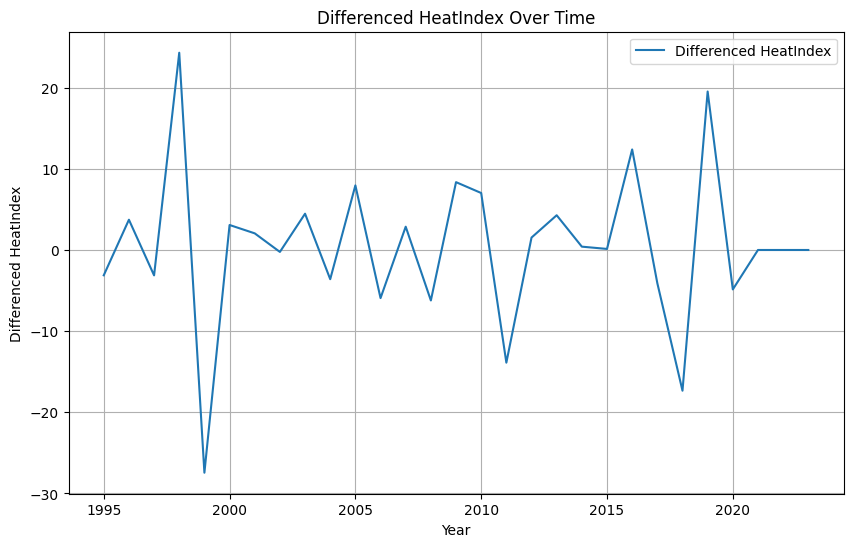

Augmented Dickey-Fuller Test Results:
ADF Statistic: -4.732
p-value: 0.000
Critical Values:
   1%: -3.753
   5%: -2.998
   10%: -2.639
KPSS Test Statistic: 0.2737296417650872
p-value: 0.1
The differenced series is stationary.


<ipython-input-104-06615c616375>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for level-stationary, 'ct' for trend-stationary


In [ ]:
# Apply differencing
df['HeatIndex_diff'] = df['HeatIndex'].diff()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'][1:], df['HeatIndex_diff'][1:], label="Differenced HeatIndex")
plt.title("Differenced HeatIndex Over Time")
plt.xlabel("Year")
plt.ylabel("Differenced HeatIndex")
plt.legend()
plt.grid(True)
plt.show()

# Re-check stationarity
is_stationary_diff = check_stationarity(df['HeatIndex_diff'].dropna()) and check_stationarity_KPSS(df['HeatIndex_diff'].dropna())
if is_stationary_diff:
    print("The differenced series is stationary.")
else:
    print("The differenced series is still non-stationary.")


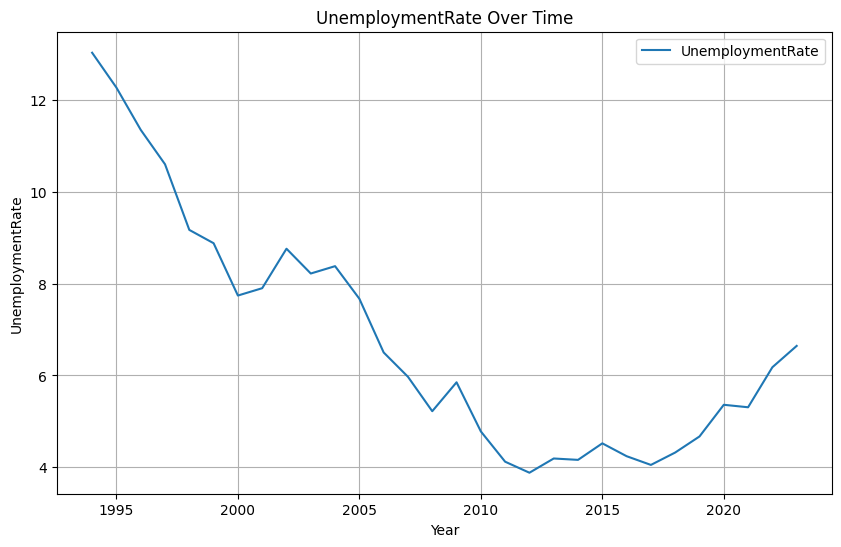

Augmented Dickey-Fuller Test Results:
ADF Statistic: -2.126
p-value: 0.234
Critical Values:
   1%: -3.700
   5%: -2.976
   10%: -2.628


False

In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['UnemploymentRate'], label="UnemploymentRate")
plt.title("UnemploymentRate Over Time")
plt.xlabel("Year")
plt.ylabel("UnemploymentRate")
plt.legend()
plt.grid(True)
plt.show()

check_stationarity(df['UnemploymentRate'])

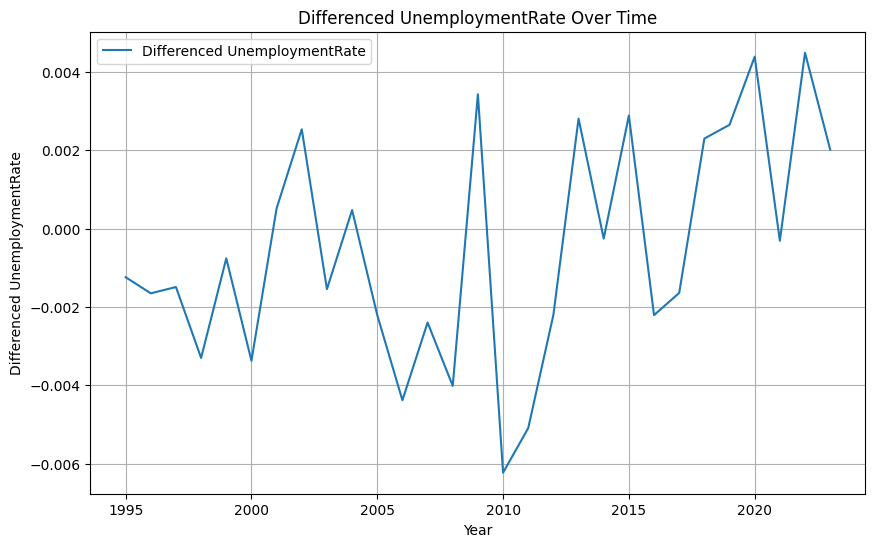

Augmented Dickey-Fuller Test Results:
ADF Statistic: -4.095
p-value: 0.001
Critical Values:
   1%: -3.689
   5%: -2.972
   10%: -2.625
KPSS Test Statistic: 0.46202025954396414
p-value: 0.050422301920705126
The differenced series is stationary.


In [ ]:
# Apply differencing
df['UnemploymentRate_diff'] = (np.log(df['UnemploymentRate'])**(1/20)).diff()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'][1:], df['UnemploymentRate_diff'][1:], label="Differenced UnemploymentRate")
plt.title("Differenced UnemploymentRate Over Time")
plt.xlabel("Year")
plt.ylabel("Differenced UnemploymentRate")
plt.legend()
plt.grid(True)
plt.show()

# Re-check stationarity
is_stationary_diff = check_stationarity(df['UnemploymentRate_diff'].dropna()) and check_stationarity_KPSS(df['UnemploymentRate_diff'].dropna())
if is_stationary_diff:
    print("The differenced series is stationary.")
else:
    print("The differenced series is still non-stationary.")


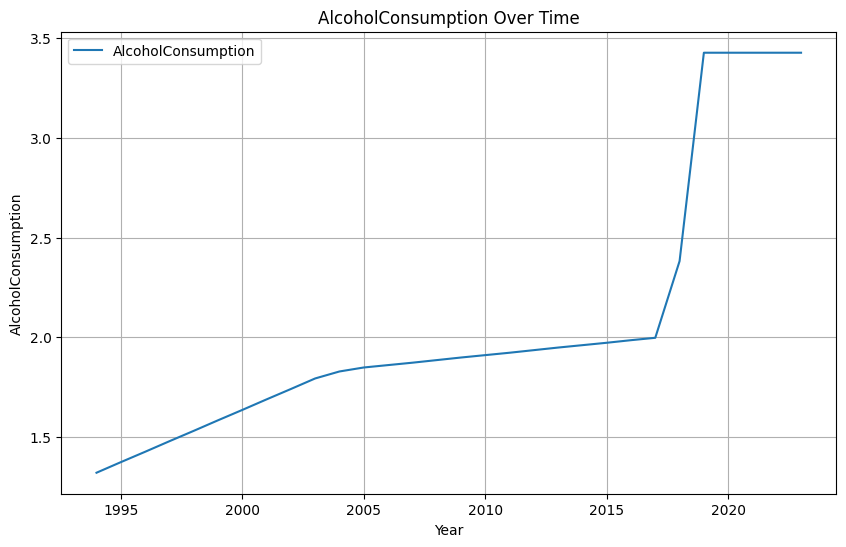

Augmented Dickey-Fuller Test Results:
ADF Statistic: 0.178
p-value: 0.971
Critical Values:
   1%: -3.679
   5%: -2.968
   10%: -2.623


False

In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['AlcoholConsumption'], label="AlcoholConsumption")
plt.title("AlcoholConsumption Over Time")
plt.xlabel("Year")
plt.ylabel("AlcoholConsumption")
plt.legend()
plt.grid(True)
plt.show()

check_stationarity(df['AlcoholConsumption'])

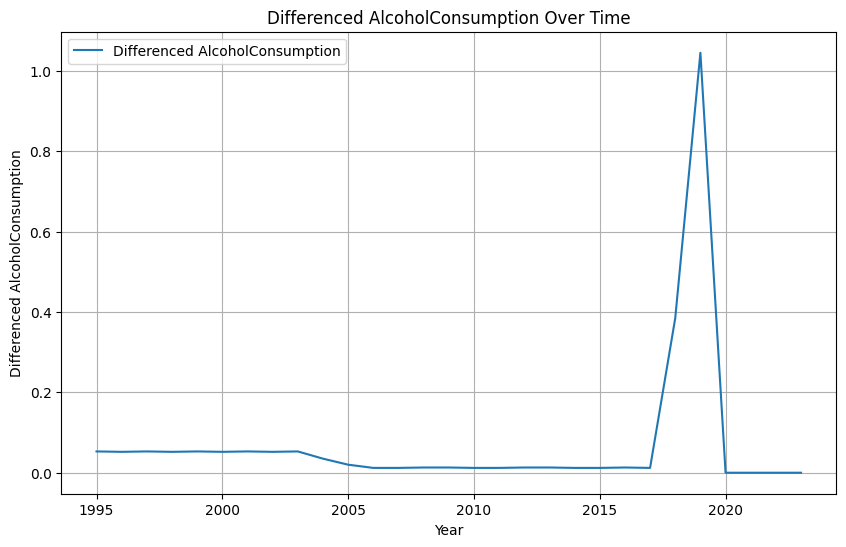

Augmented Dickey-Fuller Test Results:
ADF Statistic: -3.936
p-value: 0.002
Critical Values:
   1%: -3.689
   5%: -2.972
   10%: -2.625
KPSS Test Statistic: 0.20549562949652994
p-value: 0.1
The differenced series is stationary.


<ipython-input-104-06615c616375>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for level-stationary, 'ct' for trend-stationary


In [ ]:
# Apply differencing
df['AlcoholConsumption_diff'] = df['AlcoholConsumption'].diff()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'][1:], df['AlcoholConsumption_diff'][1:], label="Differenced AlcoholConsumption")
plt.title("Differenced AlcoholConsumption Over Time")
plt.xlabel("Year")
plt.ylabel("Differenced AlcoholConsumption")
plt.legend()
plt.grid(True)
plt.show()

# Re-check stationarity
is_stationary_diff = check_stationarity(df['AlcoholConsumption_diff'].dropna()) and check_stationarity_KPSS(df['AlcoholConsumption_diff'].dropna())
if is_stationary_diff:
    print("The differenced series is stationary.")
else:
    print("The differenced series is still non-stationary.")


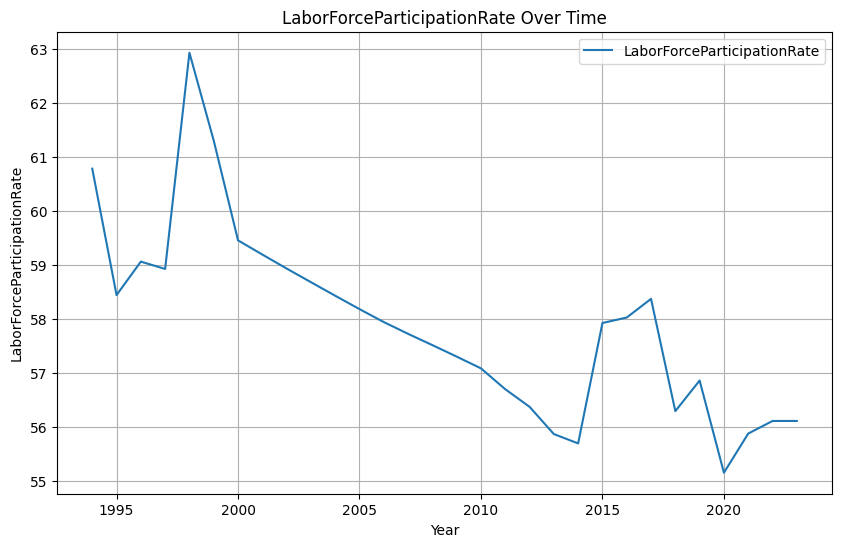

Augmented Dickey-Fuller Test Results:
ADF Statistic: -2.200
p-value: 0.206
Critical Values:
   1%: -3.679
   5%: -2.968
   10%: -2.623


False

In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['LaborForceParticipationRate'], label="LaborForceParticipationRate")
plt.title("LaborForceParticipationRate Over Time")
plt.xlabel("Year")
plt.ylabel("LaborForceParticipationRate")
plt.legend()
plt.grid(True)
plt.show()

check_stationarity(df['LaborForceParticipationRate'])

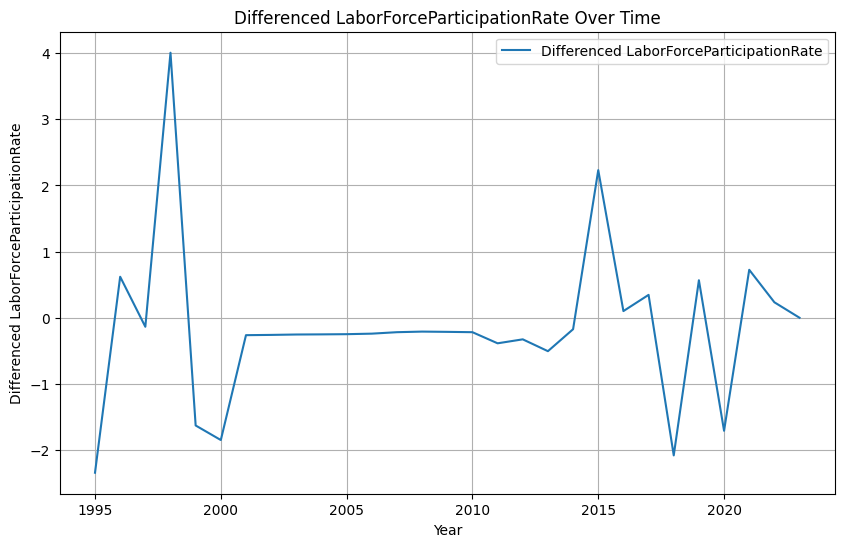

Augmented Dickey-Fuller Test Results:
ADF Statistic: -5.042
p-value: 0.000
Critical Values:
   1%: -3.711
   5%: -2.981
   10%: -2.630
KPSS Test Statistic: 0.048133044877344926
p-value: 0.1
The differenced series is stationary.


<ipython-input-104-06615c616375>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for level-stationary, 'ct' for trend-stationary


In [ ]:
# Apply differencing
df['LaborForceParticipationRate_diff'] = df['LaborForceParticipationRate'].diff()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'][1:], df['LaborForceParticipationRate_diff'][1:], label="Differenced LaborForceParticipationRate")
plt.title("Differenced LaborForceParticipationRate Over Time")
plt.xlabel("Year")
plt.ylabel("Differenced LaborForceParticipationRate")
plt.legend()
plt.grid(True)
plt.show()

# Re-check stationarity
is_stationary_diff = check_stationarity(df['LaborForceParticipationRate_diff'].dropna()) and check_stationarity_KPSS(df['LaborForceParticipationRate_diff'].dropna())
if is_stationary_diff:
    print("The differenced series is stationary.")
else:
    print("The differenced series is still non-stationary.")


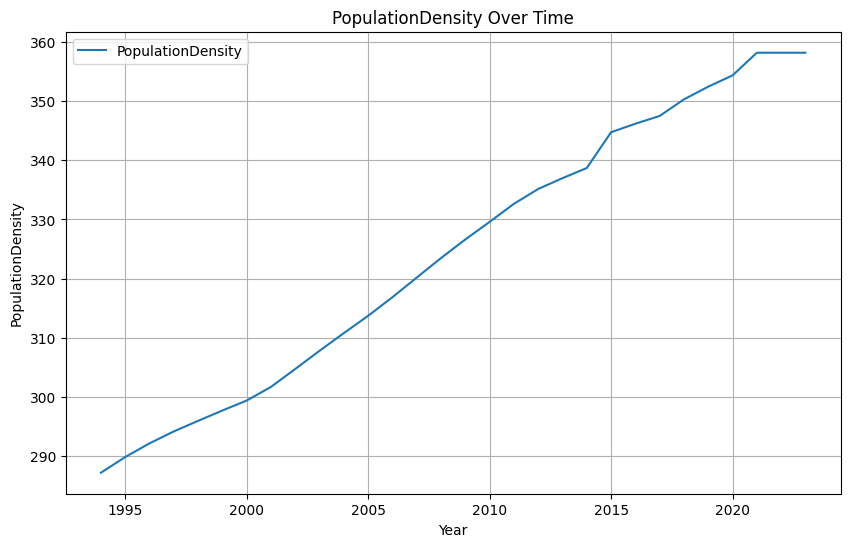

Augmented Dickey-Fuller Test Results:
ADF Statistic: -2.847
p-value: 0.052
Critical Values:
   1%: -3.753
   5%: -2.998
   10%: -2.639


False

In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['PopulationDensity'], label="PopulationDensity")
plt.title("PopulationDensity Over Time")
plt.xlabel("Year")
plt.ylabel("PopulationDensity")
plt.legend()
plt.grid(True)
plt.show()

check_stationarity(df['PopulationDensity'])

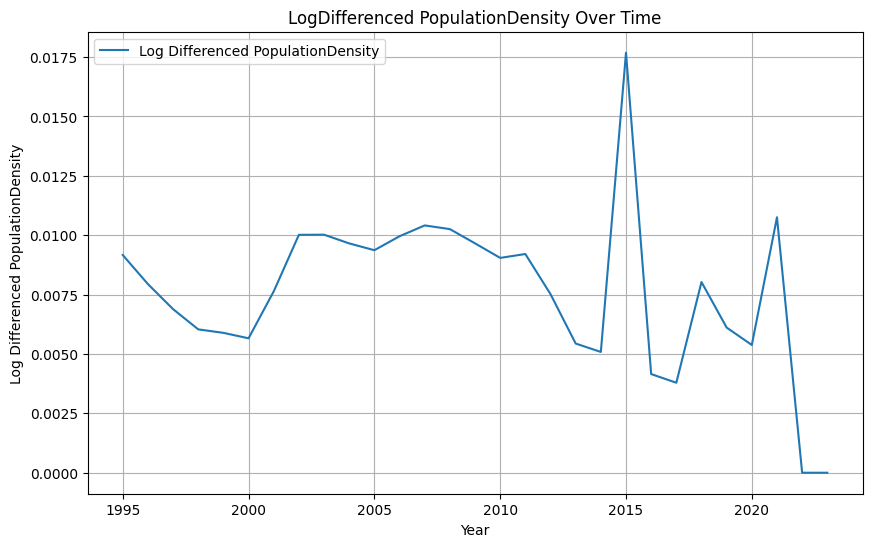

Augmented Dickey-Fuller Test Results:
ADF Statistic: -4.027
p-value: 0.001
Critical Values:
   1%: -3.689
   5%: -2.972
   10%: -2.625
KPSS Test Statistic: 0.3970260226357232
p-value: 0.07843705920874001
The log differenced series is stationary.


In [ ]:
# Apply log transformation
df['PopulationDensity_log'] = np.log(df['PopulationDensity'])

# Apply differencing
df['PopulationDensity_log_diff'] = df['PopulationDensity_log'].diff()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'][1:], df['PopulationDensity_log_diff'][1:], label="Log Differenced PopulationDensity")
plt.title("LogDifferenced PopulationDensity Over Time")
plt.xlabel("Year")
plt.ylabel("Log Differenced PopulationDensity")
plt.legend()
plt.grid(True)
plt.show()

# Re-check stationarity
is_stationary_diff = check_stationarity(df['PopulationDensity_log_diff'].dropna()) and check_stationarity_KPSS(df['PopulationDensity_log_diff'].dropna())
if is_stationary_diff:
    print("The log differenced series is stationary.")
else:
    print("The log differenced series is still non-stationary.")


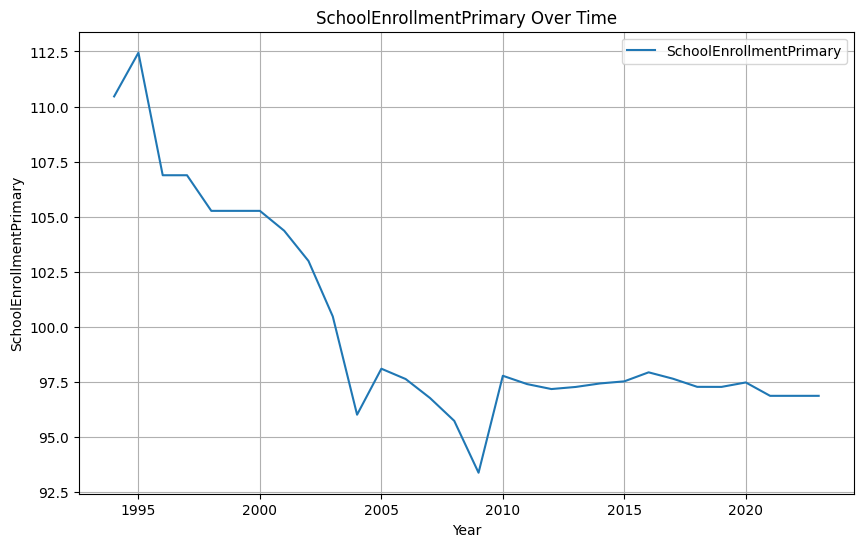

Augmented Dickey-Fuller Test Results:
ADF Statistic: -3.429
p-value: 0.010
Critical Values:
   1%: -3.770
   5%: -3.005
   10%: -2.643
KPSS Test Statistic: 0.6326144635364174
p-value: 0.019671412405780235
The original series is non-stationary.


In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['SchoolEnrollmentPrimary'], label="SchoolEnrollmentPrimary")
plt.title("SchoolEnrollmentPrimary Over Time")
plt.xlabel("Year")
plt.ylabel("SchoolEnrollmentPrimary")
plt.legend()
plt.grid(True)
plt.show()

#check stationarity
is_stationary= check_stationarity(df['SchoolEnrollmentPrimary']) and check_stationarity_KPSS(df['SchoolEnrollmentPrimary'])
if is_stationary:
    print("The original series is stationary.")
else:
    print("The original series is non-stationary.")


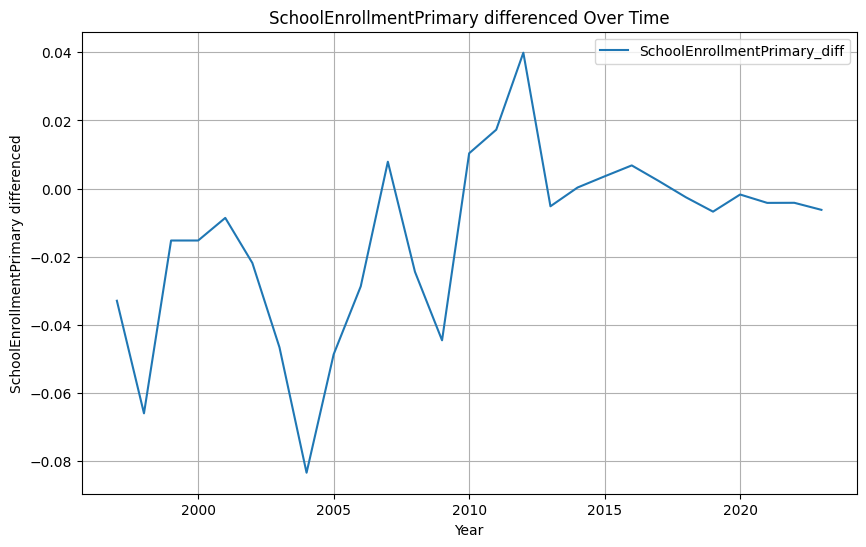

Augmented Dickey-Fuller Test Results:
ADF Statistic: -3.358
p-value: 0.012
Critical Values:
   1%: -3.859
   5%: -3.042
   10%: -2.661
KPSS Test Statistic: 0.5062031772796313
p-value: 0.04026955466674972
The differenced series is non-stationary.


In [ ]:
# Apply log transformation
df['SchoolEnrollmentPrimary_diff'] = np.log(df['SchoolEnrollmentPrimary']).diff(3)


# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['SchoolEnrollmentPrimary_diff'], label="SchoolEnrollmentPrimary_diff")
plt.title("SchoolEnrollmentPrimary differenced Over Time")
plt.xlabel("Year")
plt.ylabel("SchoolEnrollmentPrimary differenced")
plt.legend()
plt.grid(True)
plt.show()

#check stationarity
is_stationary= check_stationarity(df['SchoolEnrollmentPrimary_diff'].dropna()) and check_stationarity_KPSS(df['SchoolEnrollmentPrimary_diff'].dropna())
if is_stationary:
    print("The differenced series is stationary.")
else:
    print("The differenced series is non-stationary.")

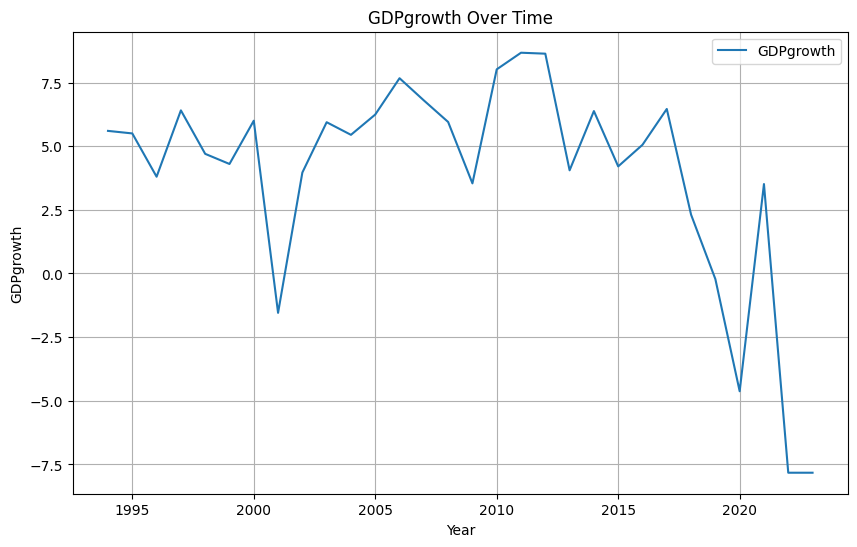

Augmented Dickey-Fuller Test Results:
ADF Statistic: 0.016
p-value: 0.960
Critical Values:
   1%: -3.689
   5%: -2.972
   10%: -2.625
The original series is non-stationary.


In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['GDPgrowth'], label="GDPgrowth")
plt.title("GDPgrowth Over Time")
plt.xlabel("Year")
plt.ylabel("GDPgrowth")
plt.legend()
plt.grid(True)
plt.show()

#check stationarity
is_stationary= check_stationarity(df['GDPgrowth']) and check_stationarity_KPSS(df['GDPgrowth'])
if is_stationary:
    print("The original series is stationary.")
else:
    print("The original series is non-stationary.")


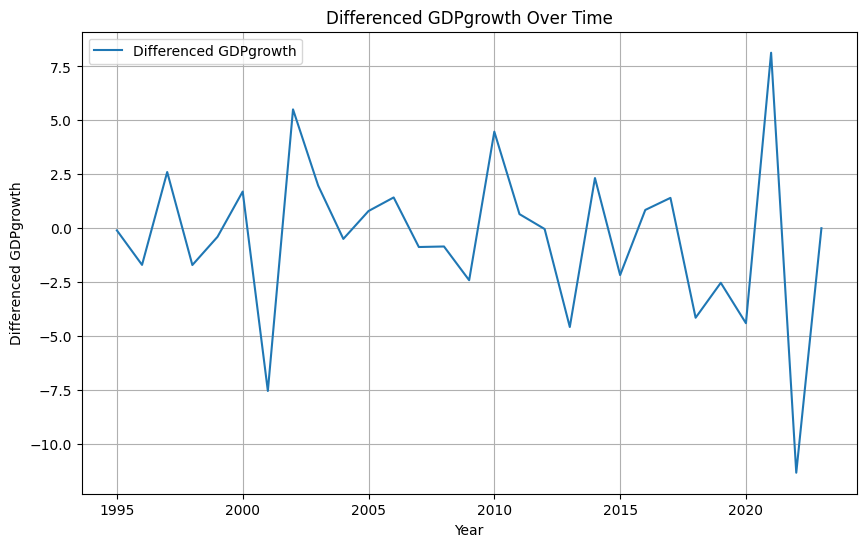

Augmented Dickey-Fuller Test Results:
ADF Statistic: -8.612
p-value: 0.000
Critical Values:
   1%: -3.689
   5%: -2.972
   10%: -2.625
KPSS Test Statistic: 0.29121587374668234
p-value: 0.1
The differenced series is stationary.


<ipython-input-104-06615c616375>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')  # 'c' for level-stationary, 'ct' for trend-stationary


In [ ]:
# Apply differencing
df['GDPgrowth_diff'] = df['GDPgrowth'].diff()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'][1:], df['GDPgrowth_diff'][1:], label="Differenced GDPgrowth")
plt.title("Differenced GDPgrowth Over Time")
plt.xlabel("Year")
plt.ylabel("Differenced GDPgrowth")
plt.legend()
plt.grid(True)
plt.show()

# Re-check stationarity
is_stationary_diff = check_stationarity(df['GDPgrowth_diff'].dropna()) and check_stationarity_KPSS(df['GDPgrowth_diff'].dropna())
if is_stationary_diff:
    print("The differenced series is stationary.")
else:
    print("The differenced series is still non-stationary.")


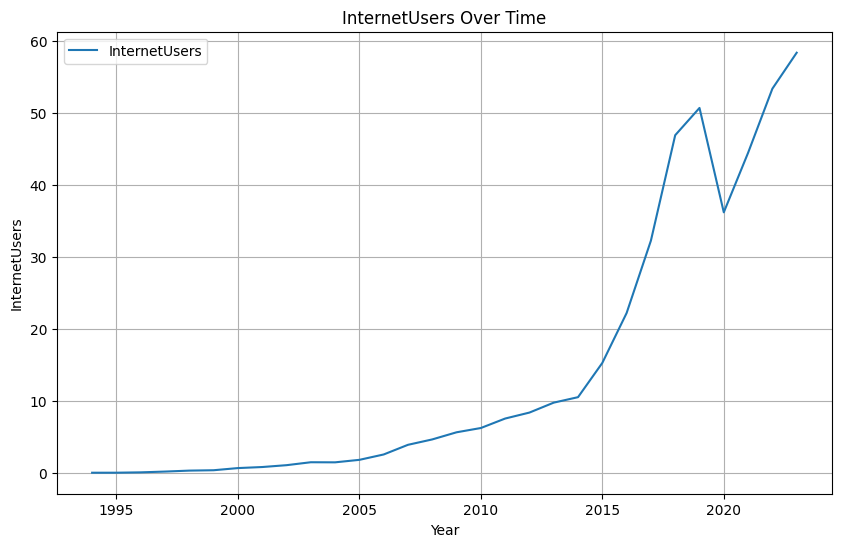

Augmented Dickey-Fuller Test Results:
ADF Statistic: 3.050
p-value: 1.000
Critical Values:
   1%: -3.809
   5%: -3.022
   10%: -2.651
The original series is non-stationary.


In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['InternetUsers'], label="InternetUsers")
plt.title("InternetUsers Over Time")
plt.xlabel("Year")
plt.ylabel("InternetUsers")
plt.legend()
plt.grid(True)
plt.show()

#check stationarity
is_stationary= check_stationarity(df['InternetUsers'])
if is_stationary:
    print("The original series is stationary.")
else:
    print("The original series is non-stationary.")


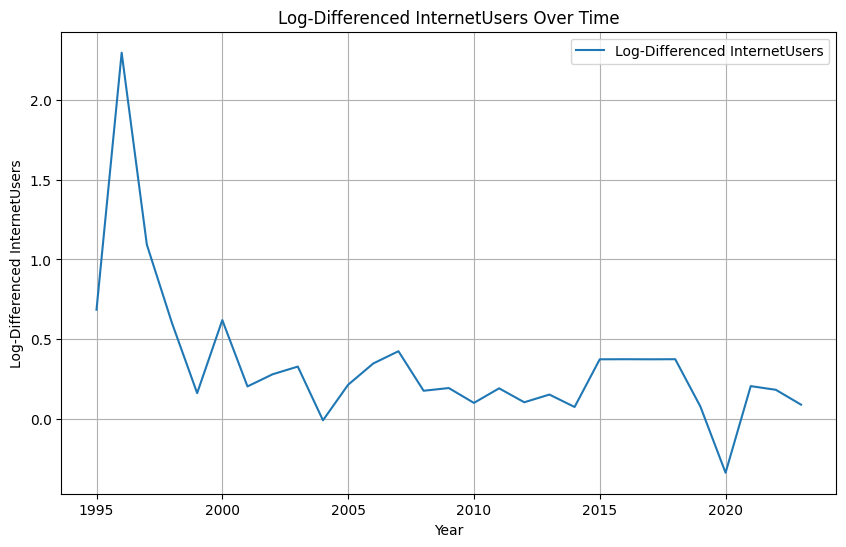

Augmented Dickey-Fuller Test Results:
ADF Statistic: -3.007
p-value: 0.034
Critical Values:
   1%: -3.689
   5%: -2.972
   10%: -2.625
KPSS Test Statistic: 0.5022872420810366
p-value: 0.04115152205382059
The differenced series is still non-stationary.


In [ ]:
# Apply log transformation
df['InternetUsers_log'] = np.log(df['InternetUsers'])

# Apply differencing
df['InternetUsers_log_diff'] = (df['InternetUsers_log']).diff()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['Year'][1:], df['InternetUsers_log_diff'][1:], label="Log-Differenced InternetUsers")
plt.title("Log-Differenced InternetUsers Over Time")
plt.xlabel("Year")
plt.ylabel("Log-Differenced InternetUsers")
plt.legend()
plt.grid(True)
plt.show()

# Re-check stationarity
is_stationary_diff = check_stationarity(df['InternetUsers_log_diff'].dropna()) and check_stationarity_KPSS(df['InternetUsers_log_diff'].dropna())
if is_stationary_diff:
    print("The differenced series is stationary.")
else:
    print("The differenced series is still non-stationary.")


In [ ]:
df.head()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate,...,HeatIndex_diff,UnemploymentRate_diff,AlcoholConsumption_diff,LaborForceParticipationRate_diff,PopulationDensity_log,PopulationDensity_log_diff,SchoolEnrollmentPrimary_diff,GDPgrowth_diff,InternetUsers_log,InternetUsers_log_diff
0,1994,7.563295,1.320,6.81,5.599919,0.002765,60.789,287.222835,110.460068,13.03,...,NaN,NaN,NaN,NaN,5.660258,NaN,NaN,NaN,-5.890553,NaN
1,1995,8.879073,1.373,3.69,5.500085,0.005484,58.447,289.867198,112.443451,12.27,...,-3.12,-0.001241,0.053,-2.342,5.669423,0.009165,NaN,-0.099833,-5.205841,0.684712
2,1996,9.687539,1.425,7.42,3.799967,0.054464,59.067,292.178377,106.883110,11.35,...,3.73,-0.001652,0.052,0.620,5.677364,0.007942,NaN,-1.700118,-2.910206,2.295635
3,1997,10.032998,1.478,4.29,6.405400,0.162465,58.931,294.197465,106.883110,10.60,...,-3.13,-0.001491,0.053,-0.136,5.684251,0.006887,-0.032918,2.605432,-1.817295,1.092911
4,1998,10.023450,1.530,28.60,4.698423,0.296351,62.937,295.978281,105.266380,9.17,...,24.31,-0.003301,0.052,4.006,5.690286,0.006035,-0.065956,-1.706977,-1.216210,0.601085


In [ ]:
stationary_df = df[['Year', 'IntentionalHomicidesRate_diff', 'HeatIndex_diff','UnemploymentRate_diff','AlcoholConsumption_diff','LaborForceParticipationRate_diff','PopulationDensity_log_diff','SchoolEnrollmentPrimary','GDPgrowth_diff','InternetUsers_log_diff']].dropna()
stationary_df.head()

,Year,IntentionalHomicidesRate_diff,HeatIndex_diff,UnemploymentRate_diff,AlcoholConsumption_diff,LaborForceParticipationRate_diff,PopulationDensity_log_diff,SchoolEnrollmentPrimary,GDPgrowth_diff,InternetUsers_log_diff
1,1995,1.315778,-3.12,-0.001241,0.053,-2.342,0.009165,112.443451,-0.099833,0.684712
2,1996,0.808466,3.73,-0.001652,0.052,0.620,0.007942,106.883110,-1.700118,2.295635
3,1997,0.345458,-3.13,-0.001491,0.053,-0.136,0.006887,106.883110,2.605432,1.092911
4,1998,-0.009548,24.31,-0.003301,0.052,4.006,0.006035,105.266380,-1.706977,0.601085
5,1999,0.254845,-27.45,-0.000760,0.053,-1.628,0.005888,105.266380,-0.397883,0.161848


In [ ]:
stationary_df.to_csv('stationary.csv', index=False)
